In [23]:
import numpy as np
import math
import pandas as pd
from pathlib import Path
import json

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm, colors

In [29]:
# some basic parameters
r = 150
w = 31.06
h = 25.79
offset = (1.32 - 2 * w, 2.59 + 4 * h)

# notch
s = 8
notch_coords = np.array([[2*r, r - s/2], [2*r, r + s/2], [2*r - 0.5*s, r]])

map_fdir = Path().absolute().parent
df = pd.read_csv(map_fdir / 'dione_wafermap.csv')
wm = {}
for i, row in df.iterrows():
    wm[int(row['reticle'])] = row['x']/1000, row['y']/1000 # unit mm

# measured data json file
root = Path().resolve().parent / 'Dione_data' / 'nit_loss_test_cells_BO_wafer2'
# root = Path().resolve().parent / 'Dione_nit_wg_loss' / 'pdk_grating_test_cells_2x14_BO_wafer2'
width = 1.0
fname = f'loss_{width}um.json'

with open(root / fname, 'r') as f:
    loss_data = json.load(f)

tested_rets = list(loss_data.keys())
loss_values = list(loss_data.values())
vmax = np.max(loss_values)
vmin = np.min(loss_values)

# get a colormap and a norm
cmp = mpl.colormaps['RdBu_r']
norm = colors.Normalize(vmin, vmax)

# create all reticles
rets = {}
for id in range(len(wm)):
    x, y = r + wm[id][0] + offset[0], r + wm[id][1] + offset[1]
    if f'{id}' in tested_rets:
        ret = plt.Rectangle((x, y), w, h, facecolor=cmp(norm(loss_data[f'{id}'])), edgecolor='k')
    else:
        ret = plt.Rectangle((x, y), w, h, facecolor='0.5', edgecolor='0')
    rets[id] = x, y, ret

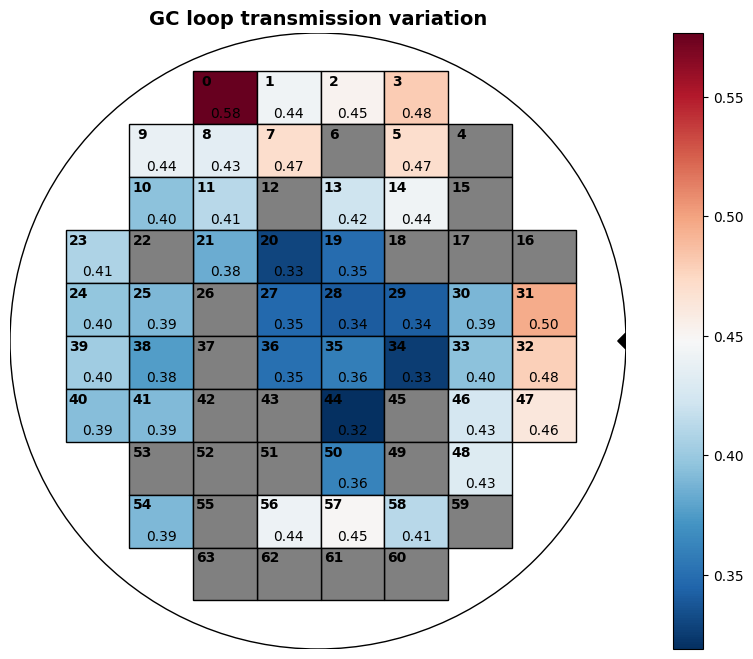

In [30]:
fig, ax = plt.subplots(figsize=(12, 8))
wafer = plt.Circle((r, r), r, color='k', fill=False)
notch = plt.Polygon(notch_coords, color='k', closed=True)
ax.add_patch(wafer)
ax.add_patch(notch)
for id, ret in rets.items():
    ax.text(ret[0] + 0.2 * w, ret[1] + 0.8 * h, id, fontsize=10, weight='bold', ha='center', va='center')
    if f'{id}' in tested_rets:
        l = loss_data[f'{id}']
        ax.text(ret[0] + 0.5 * w, ret[1] + 0.2 * h, f'{l:.2f}', fontsize=10, ha='center', va='center')
    ax.add_patch(ret[2])
ax.set_aspect("equal")
ax.set_xlim([0, 2*r])
ax.set_ylim([0, 2*r])
ax.set_title(f'GC loop transmission variation', fontsize=14, weight='bold')
ax.axis('off')
fig.colorbar(cm.ScalarMappable(norm, cmp), ax=ax)